In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind, shapiro, levene
from scipy.stats import wilcoxon
df = pd.read_csv(r"E:\5 Python\property.csv") 
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [2]:
df.shape

(13580, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

## Q1 : For the suburb Altona, it is postulated that a typical property sells for 800,000 dollar. Use the data at hand to test this assumption. Is the typical property price really 800,000 dollar or has it increased? Use a significance level of 5%.

In [4]:
df['Suburb'].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

In [5]:
# Create a new DataFrame for Altona with Suburb and Price columns
altona_df = df[df['Suburb'] == 'Altona'][['Suburb', 'Price']]
altona_df.count()

Suburb    74
Price     74
dtype: int64

In [6]:
altona_df['Price']

141       520000.0
142      1525000.0
143       720000.0
144      1120000.0
145       780000.0
           ...    
12216     913000.0
12432     458000.0
12634    1248500.0
13338     920000.0
13339     801250.0
Name: Price, Length: 74, dtype: float64

# Normality Test 
### Ho(null Hypothisis ) : Data for Altona is normal
### Ha(alternate Hypothisis) : Data for Altona is not normal

# -------------  Apply shapiro test  -------------- #

In [7]:
print("Normality Test (Shapiro-Wilk Test) for Altona:")
stat, p_value = stats.shapiro(altona_df['Price'])  # Directly use the Series
print(f"Shapiro-Wilk Test: Stat={stat:.4f}, P-value={p_value:.4f}")

# Hypothesis testing
if p_value < 0.05:
    print("  -> Reject the null hypothesis: Data for Altona is not normal.")
else:
    print("  -> Fail to reject the null hypothesis: Data for Altona is normal.")

Normality Test (Shapiro-Wilk Test) for Altona:
Shapiro-Wilk Test: Stat=0.9355, P-value=0.0009
  -> Reject the null hypothesis: Data for Altona is not normal.


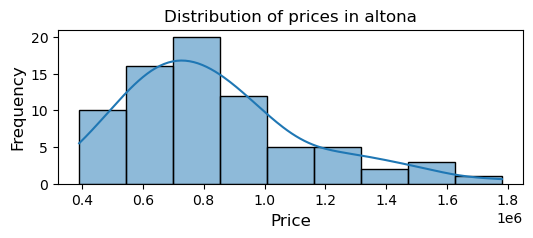

In [8]:
plt.figure(figsize=(6, 2))

sns.histplot(altona_df['Price'], kde=True)
plt.title('Distribution of prices in altona')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

**Conclusion:**
The data for Altona does not follow a normal distribution. This implies that statistical methods relying on normality assumptions (e.g., t-tests, parametric ANOVA) might not be suitable for this data. Instead, you might consider non-parametric tests, such as the Mann-Whitney U test or Wilcoxon Signed-Rank Test , depending on your analysis requirements.

## Wilcoxon Signed-Rank Test
- **Null Hypothesis (𝐻0): The mean property price in Altona is 800,000 dollar**
- **Alternative Hypothesis (𝐻1): The mean property price in Altona is greater than 800,000 dollar**

- **Interpret the p-value (significance level):**
**If p < 0.05, reject 𝐻0 and conclude the mean price has increased.
Otherwise, fail to reject 𝐻0.**

In [9]:
from scipy.stats import wilcoxon
property_prices = altona_df['Price']  # the target column

# Hypothesized median
hypothesized_price = 800000

# Calculate deviations from the hypothesized value
deviations = property_prices - hypothesized_price

# Perform one-sided Wilcoxon Signed-Rank Test
# Note: `alternative='greater'` is used to test if the property prices are greater than 800,000
stat, p_value = wilcoxon(deviations, alternative='greater')

# Print the results
print(f"Wilcoxon Signed-Rank Test: Stat={stat:.4f}, P-value={p_value:.6f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The median property price is significantly greater than 800,000 dollars.")
else:
    print("Fail to reject the null hypothesis: Insufficient evidence to conclude the median property price is greater than 800,000 dollars.")


Wilcoxon Signed-Rank Test: Stat=1381.0000, P-value=0.433417
Fail to reject the null hypothesis: Insufficient evidence to conclude the median property price is greater than 800,000 dollars.


**Conclusion:**
- There is insufficient evidence to support the claim that the mean property price in Altona is greater than 800,000 dollar.
- This suggests that the observed data does not provide strong enough support to conclude an increase in the mean property price.
- The Wilcoxon Signed-Rank Test, which evaluates the median rather than the mean, indicates that the observed data does not strongly support an increase in the property price.

**Non-Normal Distribution:**
- The earlier Shapiro-Wilk test showed that the property price data for Altona is not normally distributed. In such cases, the mean can be heavily influenced by outliers or skewed data, while the median provides a more robust measure of central tendency.
- The Wilcoxon Signed-Rank Test specifically evaluates the median differences, making the use of the median consistent with the statistical method applied.